# Code Challenge - Data Cleaning & Preparation

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook solves data cleaning and dataset preparation task given 2 tabular datasets.

This notebook is divided into 4 main sections.



1.   **Environment Setup**
2.   **Exploratory Data Analysis**
3.   **Data Preparation & Feature Engineering**
4.   **Customer Segment Analysis**

[Datasets Location](https://github.com/kadnur/DataCleaningPreparation/tree/main/Data)

## Prepare the Environment

### Import Libraries

General Use Libraries

In [243]:
# Import important libraries
import pandas as pd
from google.colab import files
import numpy as np
from datetime import datetime, timedelta
import re
from collections import Counter

# Libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Library for t-test
import scipy.stats as stats

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

### Import the Data

Clone repository containing the data.

In [244]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/DataCleaningPreparation.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 1), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 14.97 MiB | 2.81 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [245]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data/cloned-repo/Data/cloned-repo/Data
QVI_data.csv  QVI_purchase_behaviour.csv  QVI_transaction_data.xlsx


Convert the dataset files into Pandas Dataframes.

**DataFrame 1** : *QVI_transaction_data*

In [246]:
# Read QVI_transaction_data excel data file
QVI_transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

**DataFrame 2** : *QVI_purchase_behaviour*

In [247]:
# Read QVI_purchase_behaviour csv data file
QVI_purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

## Exploratory Data Analysis

### QVI transaction data - Analysis

Explore the first 10 instances of QVI transaction data.

In [248]:
# Check the head as a sanity check of correct loading of the data
QVI_transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


Get an overall insight on QVI transaction data dataframe content.

In [249]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{QVI_transaction_data.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{QVI_transaction_data.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{QVI_transaction_data.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{QVI_transaction_data.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{QVI_transaction_data.describe(include = object).transpose()}')

Dataset shape:
(264836, 8)

Dataset attributes:
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
Dataset general information:
None

Dataset description:
Numerical Data
                   count           mean           std      min      25%  \
DATE            264836.0   43464.036

Do a direct call for printing missing values.

In [250]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((QVI_transaction_data.isnull().sum() / len(QVI_transaction_data))) * 100}\n')

Percentage of Null Values per Feature
DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
dtype: float64



### QVI purchase behaviour - Analysis

Explore the first 10 instances of QVI purchase behaviour.

In [251]:
# Check the head as a sanity check of correct loading of the data
QVI_purchase_behaviour.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


Get an overall insight on QVI purchase behaviour dataframe content.

In [252]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{QVI_purchase_behaviour.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{QVI_purchase_behaviour.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{QVI_purchase_behaviour.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{QVI_purchase_behaviour.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{QVI_purchase_behaviour.describe(include = object).transpose()}')

Dataset shape:
(72637, 3)

Dataset attributes:
Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Dataset general information:
None

Dataset description:
Numerical Data
                  count          mean           std     min      25%  \
LYLTY_CARD_NBR  72637.0  136185.93177  89892.932014  1000.0  66202.0   

                     50%       75%        max  
LYLTY_CARD_NBR  134040.0  203375.0  2373711.0  

Dataset description:
Categorical Data
                  count unique         top   freq
LIFESTAGE         72637      7    RETIREES  14805
PREMIUM_CUSTOMER  72637      3  Mainst

Do a direct call for printing missing values.

In [253]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((QVI_purchase_behaviour.isnull().sum() / len(QVI_purchase_behaviour))) * 100}\n')

Percentage of Null Values per Feature
LYLTY_CARD_NBR      0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64



## Data Preprocessing & Feature Engineering

### QVI transaction data

Create copy of the raw data before making transformations.

In [254]:
# Make a copy of the raw datasets to keep the original information untouched
df_transaction_data= QVI_transaction_data.copy()

#### Duplicated Instances

Check the number of duplicated rows in DataFrame.

In [255]:
# Print the number of duplicated rows for df_transaction_data
print(f'The number of duplicated rows in logs DataFrame is {df_transaction_data.duplicated().sum()} out of {df_transaction_data.shape[0]} rows.')

The number of duplicated rows in logs DataFrame is 1 out of 264836 rows.


Drop duplicated rows in the DataFrame.

In [256]:
# keep = 'first' : Drops duplicates except for the first occurrence.
# inplace = True: Modify the DataFrame rather than creating a new one.

# Drop duplicates for transaction DataFrame
df_transaction_data.drop_duplicates(keep="first", inplace=True)

Re-check the number of duplicated rows in DataFrame.

In [257]:
# Print the number of duplicated rows for df_logs
print(f'The number of duplicated rows in logs DataFrame is {df_transaction_data.duplicated().sum()} out of {df_transaction_data.shape[0]} rows.')

The number of duplicated rows in logs DataFrame is 0 out of 264835 rows.


#### Convert Data Type

Convert the column DATE data type from int to date.

In [258]:
# Create a function to convert excel date to desired format
def excel_date_to_ymd(excel_date):
    base_date = datetime(1899, 12, 30)  # Excel's base date is 1900-01-01, but it has a bug, so we use 1899-12-30
    formatted_date = base_date + timedelta(days=excel_date)
    return formatted_date.strftime("%Y-%m-%d")

In [259]:
# Convert to DATE column type to date type
df_transaction_data['DATE'] = [excel_date_to_ymd(date) for date in df_transaction_data['DATE']]

In [260]:
# Check DataFrame
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Organise Product Name Column

Check the column Product Name and extract relevant information or delete irrelevent information based on the problem. Also, create new column consists of package gr.

In [261]:
# Check the unique values of the column PROD_NAME
df_transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

Create a new column that consists of grams of packages.

In [262]:
# Function to extract grams from product names
def extract_grams(product_name):
    match = re.search(r'(\d+)[gG]', product_name)
    if match:
        return int(match.group(1))
    else:
        return None

# Create a new column 'GRAMS' with extracted values
df_transaction_data['GRAMS'] = df_transaction_data['PROD_NAME'].apply(extract_grams).astype(int)

In [263]:
# Check DataFrame
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


Re-organise the product name column.

In [264]:
# Function to clean and fix product names
def clean_product_name(product_name):
    replacements = {'chp': 'chip',
                    '&': 'and',
                    'Red Rock Deli': 'RedRockDeli',
                    'RRD': 'RedRockDeli',
                    'Cobs Popd': 'CobsPopd',
                    'Infzns':'Infuzions',
                    'Grain Waves': 'GrainWaves',
                    'Snbts': 'Sunbites',
                    'Natural Chip Co': 'NaturalChipCo',
                    'Burger Rings': 'BurgerRings',
                    'Natural ChipCo': 'NaturalChipCo',
                    'WW': 'Woolworths',
                    'Natural Chip        Compny': 'NaturalChipCo',
                    'NCC': 'NaturalChipCo',
                    'GrnWves': 'GrainWaves',
                    'French Fries': 'FrenchFries',
                  }
    # Replace values
    for old_value, new_value in replacements.items():
        product_name = product_name.replace(old_value, new_value)

    # Remove 'g' (case-insensitive)
    product_name = re.sub(r'(\d+)[gG]', '', product_name)

    return product_name.strip()  # Remove leading and trailing spaces

# Apply the clean function to the 'PROD_NAME' column
df_transaction_data['PROD_NAME'] = df_transaction_data['PROD_NAME'].apply(clean_product_name)

In [265]:
# Check the unique values of the column PROD_NAME
df_transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil and Pesto              3304
Kettle Tortilla ChpsHnyandJlpno Chili            3296
CobsPopd Swt/Chlli andSr/Cream Chips             3269
Tyrrells Crisps     Ched and Chives              3268
CobsPopd Sea Salt  Chips                         3265
Kettle  Swt Pot Sea Salt                         3257
Tostitos Splash Of  Lime                         3252
Infuzions Thai SweetChili PotatoMix              3242
Smiths Crnkle Chip  Orgnl Big Bag                3233
Thins Potato Chips  Hot and Spicy                3229
Kettle Sensations   Camembert and Fig            3219
Doritos Corn Chips  Cheese Supreme               3217
Pringles Barbeque                                3210
Doritos Corn Chip Mexican Jalapeno               3204
Kettle Sweet Chilli And Sour Cream               3200
Smiths Crinkle Chips Salt and Vinegar            3197
Thins Chips Lightand  Tangy                      3188
Dorito Corn Chp     Supreme                      3185
Pringles SweetandSpcy BBQ   

Drop the products that are not chips.

In [266]:
# Drop the values in the PROD_NAME column
drop_names = ['Old El Paso Salsa   Dip Chnky Tom Ht', 'Old El Paso Salsa   Dip Tomato Med',
              'Old El Paso Salsa   Dip Tomato Mild', 'Doritos Salsa Mild', 'Doritos Salsa       Medium',
              'Woolworths Medium   Salsa', 'Woolworths Mild     Salsa']
for names in drop_names:
  df_transaction_data = df_transaction_data[df_transaction_data['PROD_NAME'] != names]

In [267]:
# Check the unique values of the column PROD_NAME
df_transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil and Pesto              3304
Kettle Tortilla ChpsHnyandJlpno Chili            3296
CobsPopd Swt/Chlli andSr/Cream Chips             3269
Tyrrells Crisps     Ched and Chives              3268
CobsPopd Sea Salt  Chips                         3265
Kettle  Swt Pot Sea Salt                         3257
Tostitos Splash Of  Lime                         3252
Infuzions Thai SweetChili PotatoMix              3242
Smiths Crnkle Chip  Orgnl Big Bag                3233
Thins Potato Chips  Hot and Spicy                3229
Kettle Sensations   Camembert and Fig            3219
Doritos Corn Chips  Cheese Supreme               3217
Pringles Barbeque                                3210
Doritos Corn Chip Mexican Jalapeno               3204
Kettle Sweet Chilli And Sour Cream               3200
Smiths Crinkle Chips Salt and Vinegar            3197
Thins Chips Lightand  Tangy                      3188
Dorito Corn Chp     Supreme                      3185
Pringles SweetandSpcy BBQ   

Create another column with brand names.

In [268]:
# Function to extract the first word of a product name
def extract_first_word(product_name):
    return product_name.split()[0]

# Create a new column 'FIRST_WORD' with the extracted first words
df_transaction_data['BRAND_NAME'] = df_transaction_data['PROD_NAME'].apply(extract_first_word)

In [269]:
# Check all brands are unique
df_transaction_data['BRAND_NAME'].value_counts()

Kettle           41288
Smiths           28859
Pringles         25102
Doritos          22041
RedRockDeli      17779
Infuzions        14201
Thins            14075
Woolworths       11836
CobsPopd          9693
Tostitos          9471
Twisties          9454
GrainWaves        7740
NaturalChipCo     7469
Tyrrells          6442
Cheezels          4603
CCs               4551
Dorito            3185
Sunbites          3008
Smith             2963
Cheetos           2927
BurgerRings       1564
FrenchFries       1418
Name: BRAND_NAME, dtype: int64

In [270]:
# Replace 'Dorito' with 'Doritos' only if the value is exactly 'Dorito'
df_transaction_data['BRAND_NAME'] = df_transaction_data['BRAND_NAME'].replace({'Dorito': 'Doritos'})

# Replace 'Dorito' with 'Doritos' only if the value is exactly 'Dorito'
df_transaction_data['BRAND_NAME'] = df_transaction_data['BRAND_NAME'].replace({'Smith': 'Smiths'})

In [271]:
# Check all brands are unique
df_transaction_data['BRAND_NAME'].value_counts()

Kettle           41288
Smiths           31822
Doritos          25226
Pringles         25102
RedRockDeli      17779
Infuzions        14201
Thins            14075
Woolworths       11836
CobsPopd          9693
Tostitos          9471
Twisties          9454
GrainWaves        7740
NaturalChipCo     7469
Tyrrells          6442
Cheezels          4603
CCs               4551
Sunbites          3008
Cheetos           2927
BurgerRings       1564
FrenchFries       1418
Name: BRAND_NAME, dtype: int64

In [272]:
# Check DataFrame
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME
0,2018-10-17,1,1000,1,5,NaturalChipCo SeaSalt,2,6.0,175,NaturalChipCo
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamandOnion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyandJlpno Chili,3,13.8,150,Kettle


Look at summary of DataFrame again for further analysis.

In [273]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{df_transaction_data.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{df_transaction_data.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{df_transaction_data.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{df_transaction_data.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{df_transaction_data.describe(include = object).transpose()}')

Dataset shape:
(249669, 10)

Dataset attributes:
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'GRAMS', 'BRAND_NAME'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249669 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            249669 non-null  object 
 1   STORE_NBR       249669 non-null  int64  
 2   LYLTY_CARD_NBR  249669 non-null  int64  
 3   TXN_ID          249669 non-null  int64  
 4   PROD_NBR        249669 non-null  int64  
 5   PROD_NAME       249669 non-null  object 
 6   PROD_QTY        249669 non-null  int64  
 7   TOT_SALES       249669 non-null  float64
 8   GRAMS           249669 non-null  int64  
 9   BRAND_NAME      249669 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 21.0+ MB
Dataset general information:
None

Dataset description:
Numerical

#### Outlier Analysis

Check the outliers in possible columns and later filter DataFrame to remove them.

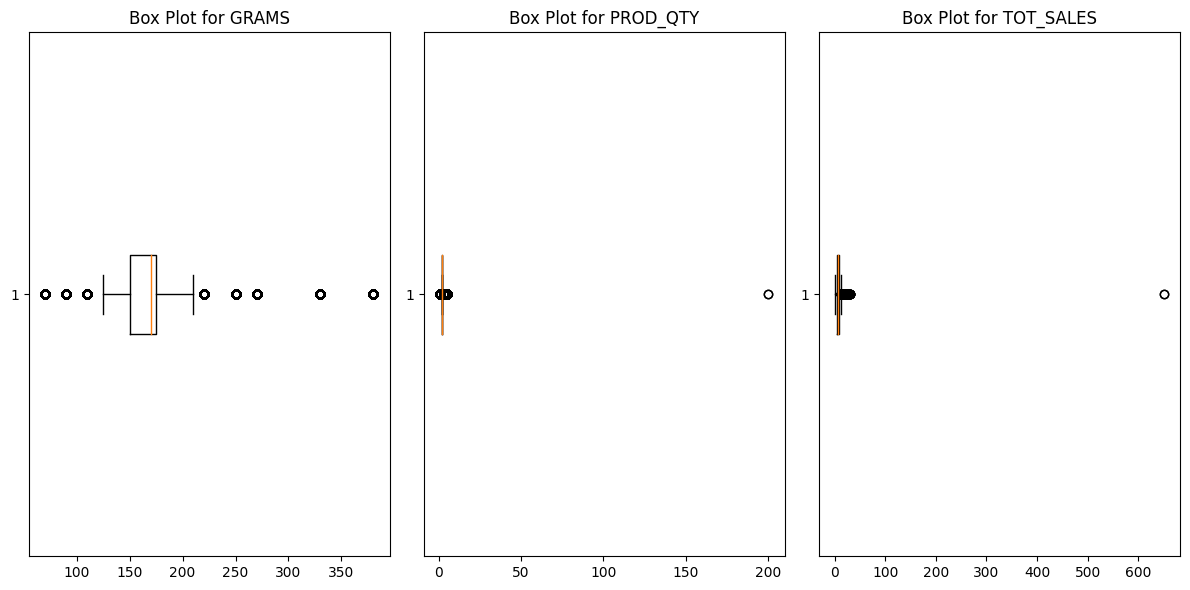

In [274]:
# Create box plots for each column
plt.figure(figsize=(12, 6))

# Box plot for GRAMS
plt.subplot(1, 3, 1)
plt.boxplot(df_transaction_data['GRAMS'], vert=False)
plt.title('Box Plot for GRAMS')

# Box plot for PROD_QTY
plt.subplot(1, 3, 2)
plt.boxplot(df_transaction_data['PROD_QTY'], vert=False)
plt.title('Box Plot for PROD_QTY')

# Box plot for TOT_SALES
plt.subplot(1, 3, 3)
plt.boxplot(df_transaction_data['TOT_SALES'], vert=False)
plt.title('Box Plot for TOT_SALES')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

For grams measure it is sensible the values between 70gr and 350gr. But for the other two columns, it is necessary to check the outliers which are maximum values.

First check product quantity.

In [275]:
# Filter the DataFrame only product quantity is 200
df_transaction_data[df_transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos


Second check total sales.

In [276]:
# Filter the DataFrame only total sales is 650.0
df_transaction_data[df_transaction_data['TOT_SALES'] == 650.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos


Check if this customer has other transactions.

In [277]:
# Filter the DataFrame only loyalty card number is 226000
df_transaction_data[df_transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos



It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.


In [278]:
# Filter the loyalty card number from the DataFrame
df_transaction_data = df_transaction_data[df_transaction_data['LYLTY_CARD_NBR'] != 226000]

Check again outliers.

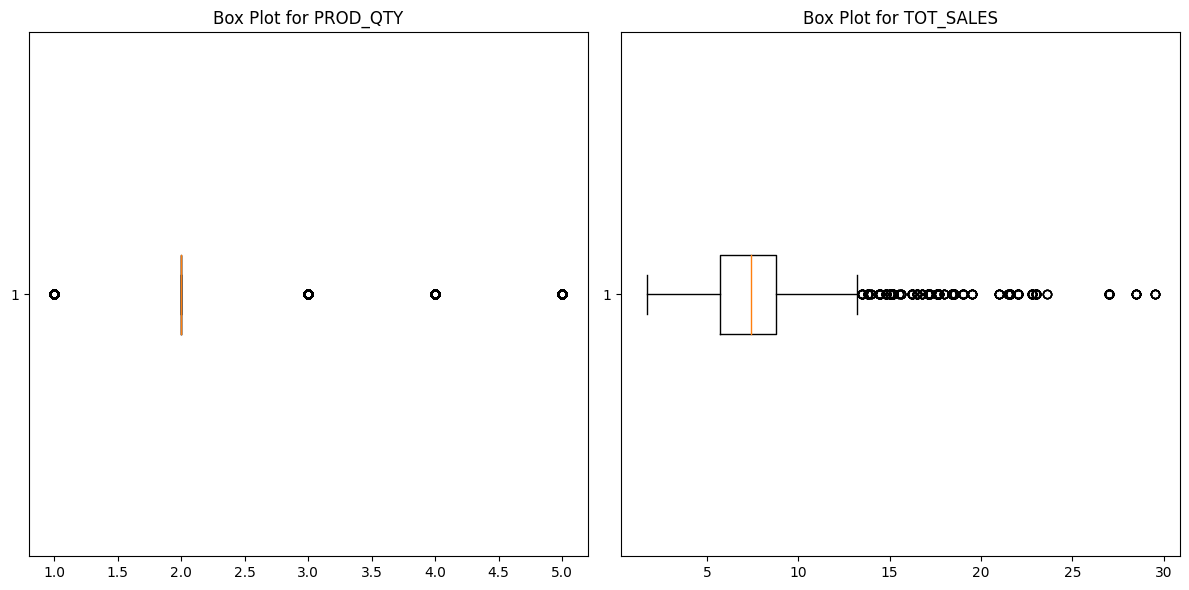

In [279]:
# Create box plots for each column
plt.figure(figsize=(12, 6))

# Box plot for PROD_QTY
plt.subplot(1, 2, 1)
plt.boxplot(df_transaction_data['PROD_QTY'], vert=False)
plt.title('Box Plot for PROD_QTY')

# Box plot for TOT_SALES
plt.subplot(1, 2, 2)
plt.boxplot(df_transaction_data['TOT_SALES'], vert=False)
plt.title('Box Plot for TOT_SALES')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Graph Analysis

Aim is to plot monthly or yearly transaction counts to see the trends. In order to that first need tp check data quality on "date" column.

In [280]:
# Count the number of transactions by date
df_transaction_data.groupby(['DATE']).count().shape

(364, 9)

Detect the missing date.

In [281]:
# Create a sequence of dates from July 1, 2018, to June 30, 2019
full_date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Create a DataFrame with the full date range
full_date_df = pd.DataFrame({'DATE': full_date_range})
full_date_df['DATE'] = full_date_df['DATE'].astype(str)

# Merge the full date range DataFrame with the transaction counts
df_transaction_data = pd.merge(full_date_df,df_transaction_data, how='left', on='DATE')

In [282]:
# Create null mask to find the row who contains empty values
null_mask = df_transaction_data.isnull().any(axis=1)
null_rows = df_transaction_data[null_mask]

# Print the rows
print(null_rows)

              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR PROD_NAME  \
121861  2018-12-25        NaN             NaN     NaN       NaN       NaN   

        PROD_QTY  TOT_SALES  GRAMS BRAND_NAME  
121861       NaN        NaN    NaN        NaN  


In [283]:
# Fill missing values (dates with no transactions) with 0
# Fill missing values for the row with DATE '2018-12-25'
fill_values = {'STORE_NBR': 0,'LYLTY_CARD_NBR': 0,'TXN_ID': 0,'PROD_NBR': 0,'PROD_NAME': 'no information','PROD_QTY': 0,'TOT_SALES': 0,
                'GRAMS': 0,'BRAND_NAME': 'no information'}
df_transaction_data.loc[df_transaction_data['DATE'] == '2018-12-25', ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'GRAMS', 'BRAND_NAME']] = fill_values.values()

Check the information filling is worked.

In [284]:
# Create null mask to find the row who contains empty values
null_mask = df_transaction_data.isnull().any(axis=1)
null_rows = df_transaction_data[null_mask]

# Print the rows
print(null_rows)

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, GRAMS, BRAND_NAME]
Index: []


In [285]:
# Check DataFrame
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,2.0,11.8,380.0,Smiths
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken,2.0,7.4,134.0,Pringles
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese,2.0,4.2,175.0,CCs
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil and Pesto,2.0,10.8,175.0,Kettle
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Lightand Tangy,2.0,6.6,175.0,Thins


In [286]:
# Change the data type from float to integer
columns_to_convert = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'GRAMS']
df_transaction_data[columns_to_convert] = df_transaction_data[columns_to_convert].astype(int)

In [287]:
# Check DataFrame
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,Smiths
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken,2,7.4,134,Pringles
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese,2,4.2,175,CCs
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil and Pesto,2,10.8,175,Kettle
4,2018-07-01,68,68193,65598,44,Thins Chips Lightand Tangy,2,6.6,175,Thins


Find the total transactions per month.

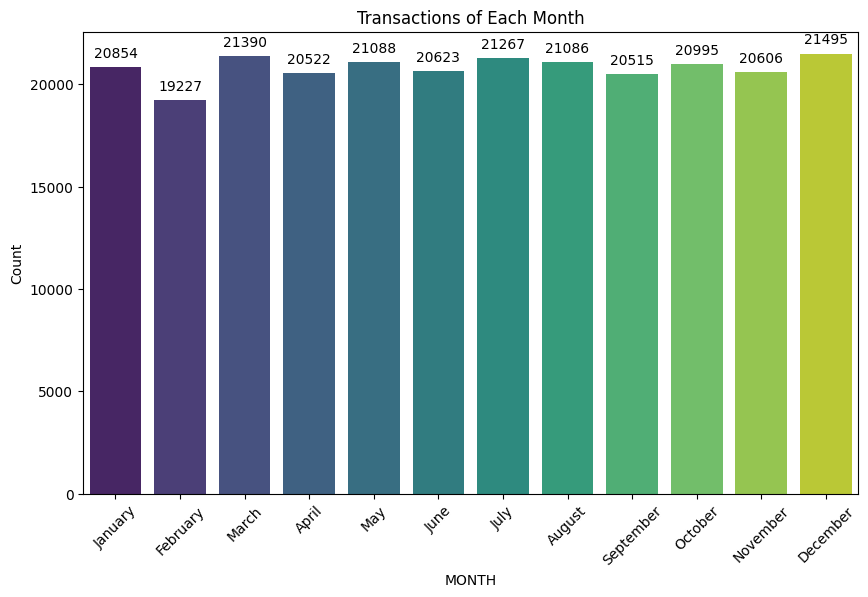

In [288]:
# Convert the 'date' column to datetime format
df_transaction_data['DATE'] = pd.to_datetime(df_transaction_data['DATE'])

# Extract the month from the 'date' column
df_transaction_data['MONTH'] = df_transaction_data['DATE'].dt.month

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MONTH', data=df_transaction_data, palette='viridis')

# Annotate the plot with total counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Transactions of Each Month')
plt.ylabel('Count')
plt.xticks(range(0, 12), calendar.month_name[1:], rotation=45)  # Assuming you want month names on the x-axis
plt.show()

The above graph shows that the maximum number of transactions happened in December, followed by March and July. Now let's look at the total transactions that happened in December.

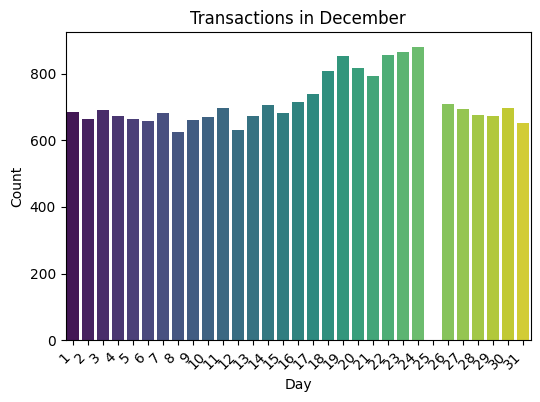

In [289]:
# Filter the DataFrame for entries in December
df_transaction_data_december = df_transaction_data[df_transaction_data['DATE'].dt.month == 12]

# Create a count plot for December using seaborn
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df_transaction_data_december['DATE'].dt.day, palette='viridis')

# Customize the plot
plt.title('Transactions in December')
plt.xlabel('Day')
plt.ylabel('Count')

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

Sales surge in the lead-up to Christmas, but zero sales occur on Christmas day due to shops closing.

Lastly, let's have a look at a histogram of the package's grammage.

<Axes: xlabel='GRAMS', ylabel='Count'>

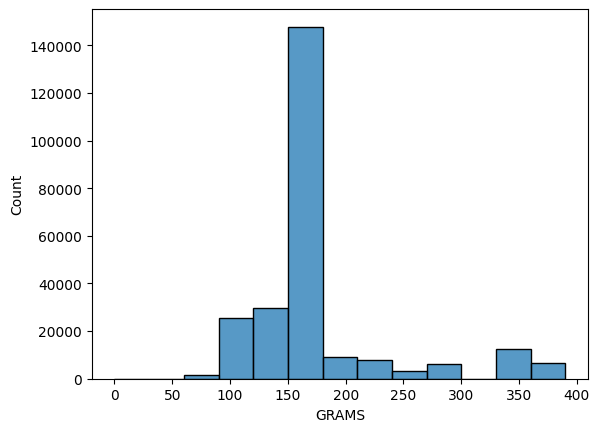

In [290]:
# Create a histogram of grams column
sns.histplot(data=df_transaction_data, x="GRAMS",binwidth=30)

The graph above shows that customers are buying more chips with a weight of 150-200.

### QVI purchase behaviour

Create copy of the raw data before making transformations.

In [291]:
# Make a copy of the raw datasets to keep the original information untouched
df_purchase_behaviour= QVI_purchase_behaviour.copy()

#### Duplicated Instances

Check the number of duplicated rows in DataFrame.

In [292]:
# Print the number of duplicated rows for df_transaction_data
print(f'The number of duplicated rows in logs DataFrame is {df_purchase_behaviour.duplicated().sum()} out of {df_purchase_behaviour.shape[0]} rows.')

The number of duplicated rows in logs DataFrame is 0 out of 72637 rows.


There is no duplicated row.

#### Data Distribution

In [293]:
# Check DataFrame
df_purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [294]:
# Check the value distribution of the column lifestage
df_purchase_behaviour['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [295]:
# Check the value distribution of the column premium_customer
df_purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Data seems consistent. So there is no need to do any modification. Let's see them in the graph.

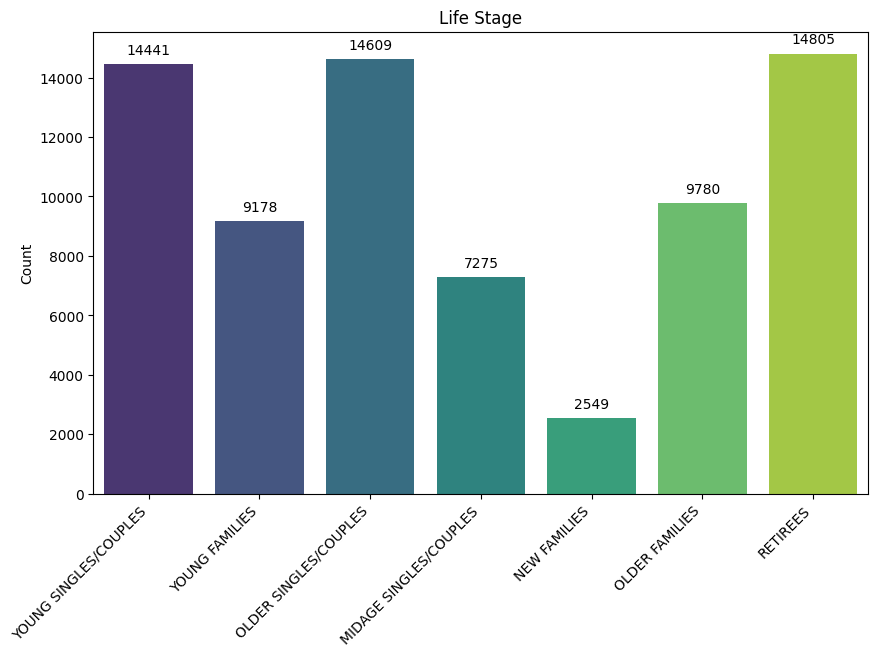

In [296]:
# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LIFESTAGE', data=df_purchase_behaviour, palette='viridis')

# Annotate the plot with total counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Life Stage')
plt.ylabel('Count')
plt.xlabel(None)

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

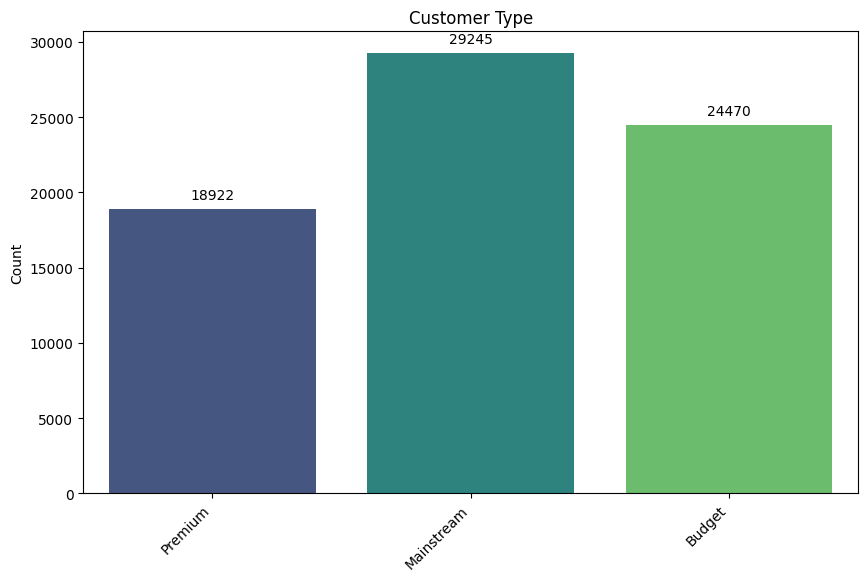

In [297]:
# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PREMIUM_CUSTOMER', data=df_purchase_behaviour, palette='viridis')

# Annotate the plot with total counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Customer Type')
plt.ylabel('Count')
plt.xlabel(None)

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

### Merge Datasets

Now, we need to merge these two DataFrames based on the column loyalty number.

In [298]:
# Merge two DataFrame
QVI_data = pd.merge(df_transaction_data,df_purchase_behaviour, how='left', on='LYLTY_CARD_NBR')

In [299]:
# Check the head as a sanity check of correct merging of the data
QVI_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME,MONTH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,Smiths,7,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken,2,7.4,134,Pringles,7,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese,2,4.2,175,CCs,7,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil and Pesto,2,10.8,175,Kettle,7,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68,68193,65598,44,Thins Chips Lightand Tangy,2,6.6,175,Thins,7,MIDAGE SINGLES/COUPLES,Budget
5,2018-07-01,69,69207,67156,49,Infuzions SourCreamandHerbs Veg Strws,2,7.6,110,Infuzions,7,MIDAGE SINGLES/COUPLES,Budget
6,2018-07-01,104,104017,103795,84,GrainWaves Plus Btroot and Chilli Jam,2,6.2,180,GrainWaves,7,MIDAGE SINGLES/COUPLES,Budget
7,2018-07-01,113,113032,115576,6,RedRockDeli Lime and Pepper,2,6.0,165,RedRockDeli,7,MIDAGE SINGLES/COUPLES,Budget
8,2018-07-01,119,119051,122360,113,Twisties Chicken,2,9.2,270,Twisties,7,MIDAGE SINGLES/COUPLES,Budget
9,2018-07-01,124,124411,128153,13,RedRockDeli Thai ChilliandLime,1,2.7,150,RedRockDeli,7,MIDAGE SINGLES/COUPLES,Budget


#### Exploratory Data Analysis

Get an overall insight on QVI data DataFrame content.

In [300]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{QVI_data.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{QVI_data.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{QVI_data.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{QVI_data.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{QVI_data.describe(include = object).transpose()}')

Dataset shape:
(249668, 13)

Dataset attributes:
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'GRAMS', 'BRAND_NAME', 'MONTH',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 249667
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              249668 non-null  datetime64[ns]
 1   STORE_NBR         249668 non-null  int64         
 2   LYLTY_CARD_NBR    249668 non-null  int64         
 3   TXN_ID            249668 non-null  int64         
 4   PROD_NBR          249668 non-null  int64         
 5   PROD_NAME         249668 non-null  object        
 6   PROD_QTY          249668 non-null  int64         
 7   TOT_SALES         249668 non-null  float64       
 8   GRAMS             249668 non-null  int64         
 9   BRAND_NAME        249

In [301]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((QVI_data.isnull().sum() / len(QVI_data))) * 100}\n')

Percentage of Null Values per Feature
DATE                0.000000
STORE_NBR           0.000000
LYLTY_CARD_NBR      0.000000
TXN_ID              0.000000
PROD_NBR            0.000000
PROD_NAME           0.000000
PROD_QTY            0.000000
TOT_SALES           0.000000
GRAMS               0.000000
BRAND_NAME          0.000000
MONTH               0.000000
LIFESTAGE           0.000401
PREMIUM_CUSTOMER    0.000401
dtype: float64



There is one null information both in the column lifestage and premium customer. That's because one missing day information. Let's fill these two columns' values as no information.

#### Missing Values

In [302]:
# Create null mask to find the row who contains empty values
null_mask = QVI_data.isnull().any(axis=1)
null_rows = QVI_data[null_mask]

# Print the rows
print(null_rows)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
121861 2018-12-25          0               0       0         0   

             PROD_NAME  PROD_QTY  TOT_SALES  GRAMS      BRAND_NAME  MONTH  \
121861  no information         0        0.0      0  no information     12   

       LIFESTAGE PREMIUM_CUSTOMER  
121861       NaN              NaN  


In [303]:
# Fill missing values for the row with DATE '2018-12-25'
fill_values = {'LIFESTAGE': 'no information','PREMIUM_CUSTOMER': 'no information'}
QVI_data.loc[QVI_data['DATE'] == '2018-12-25', ['LIFESTAGE', 'PREMIUM_CUSTOMER']] = fill_values.values()

In [304]:
# Check again for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((QVI_data.isnull().sum() / len(QVI_data))) * 100}\n')

Percentage of Null Values per Feature
DATE                0.0
STORE_NBR           0.0
LYLTY_CARD_NBR      0.0
TXN_ID              0.0
PROD_NBR            0.0
PROD_NAME           0.0
PROD_QTY            0.0
TOT_SALES           0.0
GRAMS               0.0
BRAND_NAME          0.0
MONTH               0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64



#### Save DataFrame

We need to save the DataFrame for further analysis.

In [305]:
# Export the DataFrame to an CSV file
QVI_data.to_csv('QVI_data.csv', index=False)
files.download('QVI_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now everything looks good we can start our customer analysis.

## Customer Segment Analysis

In this part, we are going to plot some graphs to understand the customers' behaviour.

Before starting graph analysis first frop the one row with no information. Because it will not provide any information.

In [306]:
# Drop the row that contains no information
QVI_data = QVI_data.loc[QVI_data['DATE'] != '2018-12-25']

### Total Sales by LifeStage and Customer Type

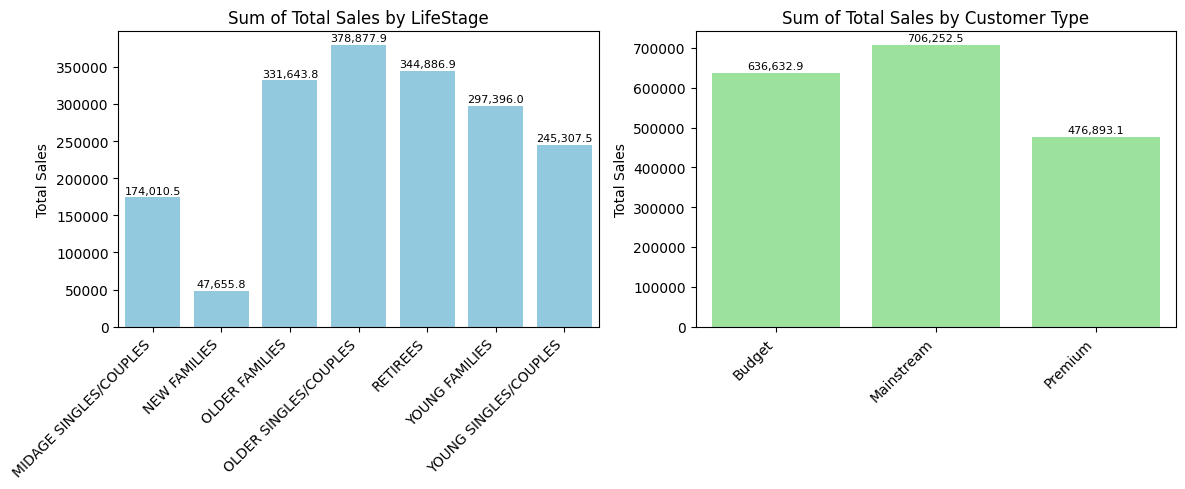

In [307]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting sum of total sales by life stage
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=QVI_data, estimator=sum,errorbar=None, ax=axes[0], color='skyblue')
axes[0].set_title('Sum of Total Sales by LifeStage')

# Optionally, rotate x-axis labels for better visibility
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('')  # Hide x-axis title
axes[0].set_ylabel('Total Sales')

# Display total sums at the top of the columns
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), fontsize=8,textcoords='offset points')

# Plotting sum of total sales by premium
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=QVI_data, estimator=sum,errorbar=None, ax=axes[1],color='lightgreen')
axes[1].set_title('Sum of Total Sales by Customer Type')

# Optionally, rotate x-axis labels for better visibility
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('')  # Hide x-axis title
axes[1].set_ylabel('Total Sales')

# Display total sums at the top of the columns
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():,.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5),fontsize=8, textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

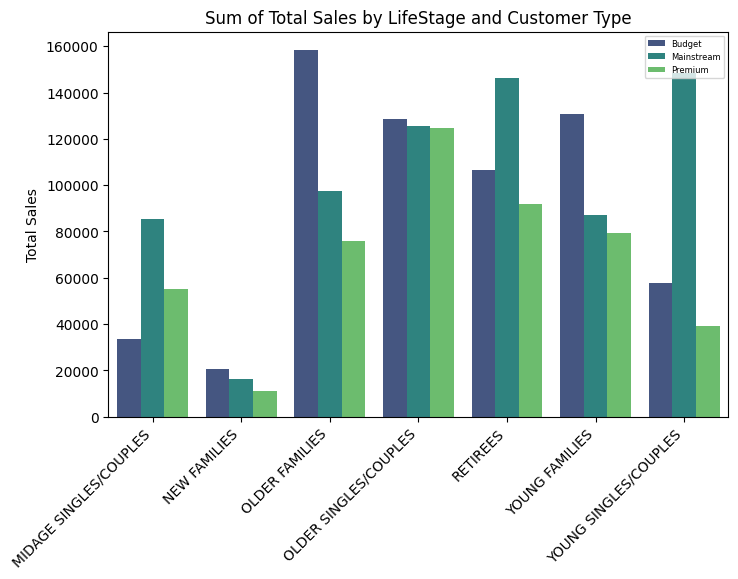

In [308]:
# Plotting sum of total sales by life stage and customer type
plt.figure(figsize=(8, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=QVI_data, estimator='sum', errorbar=None, hue='PREMIUM_CUSTOMER',palette='viridis')

# Customize the plot
plt.title('Sum of Total Sales by LifeStage and Customer Type')
plt.ylabel('Total Sales')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()


Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees. Let's see if the higher sales are due to there being more customers who buy chips.



### Number of Customers by LifeStage and Customer Type

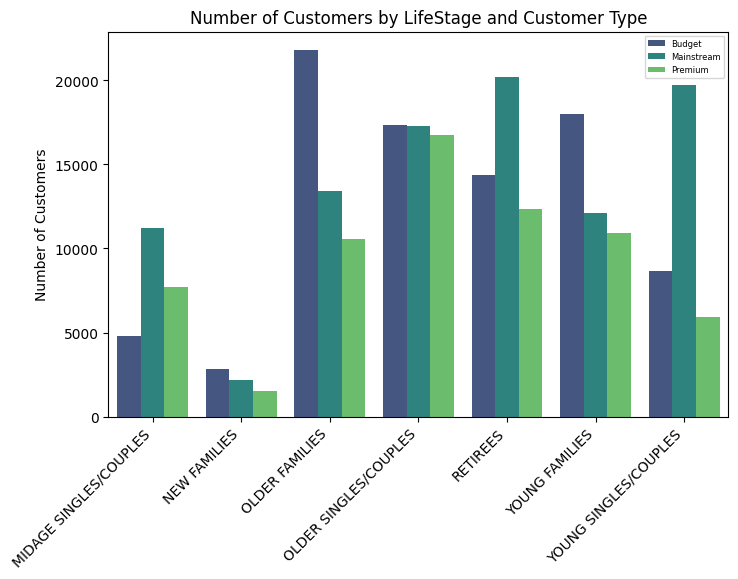

In [309]:
# Plotting count of customers by life stage and customer type
plt.figure(figsize=(8, 5))
sns.countplot(x='LIFESTAGE', data=QVI_data, hue='PREMIUM_CUSTOMER',palette='viridis')

# Customize the plot
plt.title('Number of Customers by LifeStage and Customer Type')
plt.ylabel('Number of Customers')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()


Higher sales may also be driven by more units of chips being bought per customer.

### Average Product Units by LifeStage and Customer Type

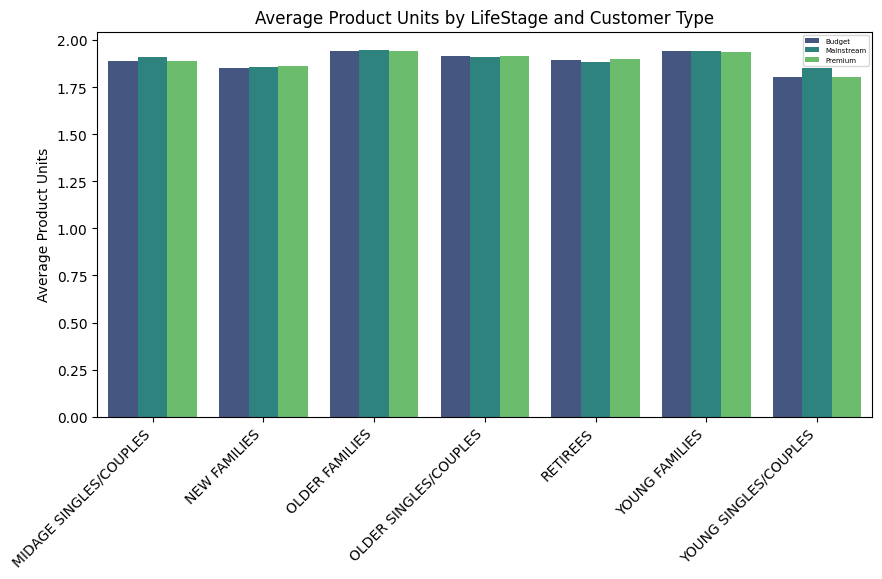

In [310]:
# Plotting average product units by life stage and customer type
plt.figure(figsize=(10, 5))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', data=QVI_data, estimator='mean', errorbar=None, hue='PREMIUM_CUSTOMER',palette='viridis')

# Customize the plot
plt.title('Average Product Units by LifeStage and Customer Type')
plt.ylabel('Average Product Units')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 5 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

Older families and young families in general buy more chips per customer.

### Average Price by LifeStage and Customer Type

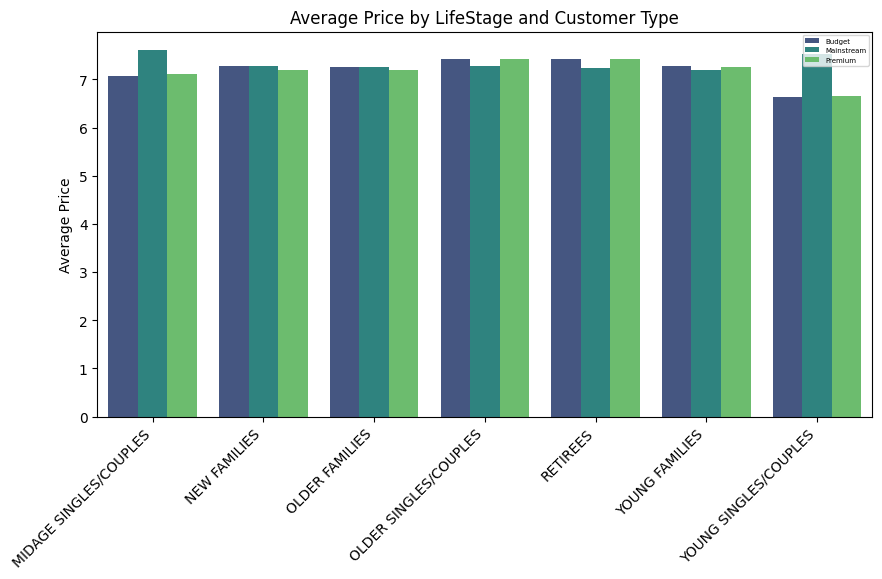

In [311]:
# Plotting average price by life stage and customer type
plt.figure(figsize=(10, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=QVI_data, estimator='mean', errorbar=None, hue='PREMIUM_CUSTOMER',palette='viridis')

# Customize the plot
plt.title('Average Price by LifeStage and Customer Type')
plt.ylabel('Average Price')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 5 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

Mainstream midage and young singles and couples are willing to pay more for chips compared to budget and premium shoppers, possibly because premium shoppers buy healthy snacks for entertainment purposes and there are fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

### T test

The statistical difference in average price per unit is not significant, allowing us to examine if it is statistically different.

In [312]:
# Preparing two-sample
data_group1 = QVI_data[['TOT_SALES']][((QVI_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (QVI_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')) & (QVI_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
data_group2 = QVI_data[['TOT_SALES']][((QVI_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (QVI_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')) & ((QVI_data['PREMIUM_CUSTOMER'] == 'Budget') | (QVI_data['PREMIUM_CUSTOMER'] == 'Premium'))]

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(data_group1, data_group2)

# Interpret the results:
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis; there is a significant difference between unit price for mainstream,young and mid-age singles and couples and  budget or premium, young and midage singles and couples.")
else:
  print("Fail to reject the null hypothesis; there is no significant difference between unit price for mainstream,young and mid-age singles and couples and  budget or premium, young and midage singles and couples.")

Reject the null hypothesis; there is a significant difference between unit price for mainstream,young and mid-age singles and couples and  budget or premium, young and midage singles and couples.


To retain or increase sales, we should focus on key customer segments, such as mainstream young singles/couples, and determine if they prefer a specific brand of chips.

### Brand Analysis on Specific Customer Segment

#### Mainstream - Midage Singles/Couples

In [313]:
# Create the DataFrame by filtering
QVI_data_filter = QVI_data[(QVI_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (QVI_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
QVI_data_filter2 = QVI_data[(QVI_data['LIFESTAGE'] != 'MIDAGE SINGLES/COUPLES') & (QVI_data['PREMIUM_CUSTOMER'] != 'Mainstream')]

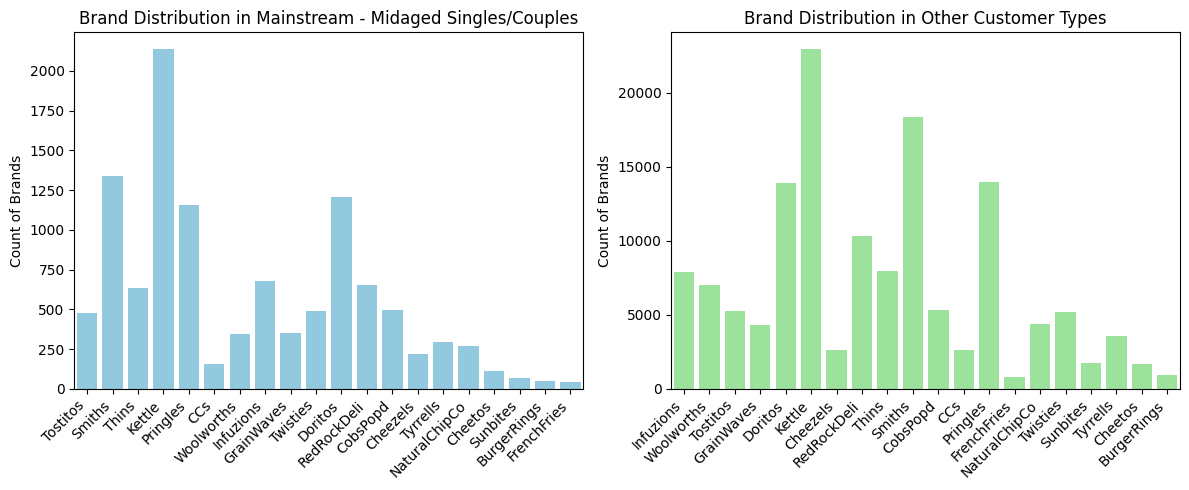

In [314]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the first graph
sns.countplot(x='BRAND_NAME', data=QVI_data_filter, ax=axes[0], color='skyblue')
axes[0].set_title('Brand Distribution in Mainstream - Midaged Singles/Couples')

# Optionally, rotate x-axis labels for better visibility
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('')  # Hide x-axis title
axes[0].set_ylabel('Count of Brands')

# Plotting the second graph
sns.countplot(x='BRAND_NAME', data=QVI_data_filter2, ax=axes[1],color='lightgreen')
axes[1].set_title('Brand Distribution in Other Customer Types')

# Optionally, rotate x-axis labels for better visibility
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('')  # Hide x-axis title
axes[1].set_ylabel('Count of Brands')

# Adjust layout
plt.tight_layout()
plt.show()

From the above graph, we can easily say that midage singles/ couples who are mainstream tend to buy more Kettles brands with a significant difference. Smiths and Doritos are following this.

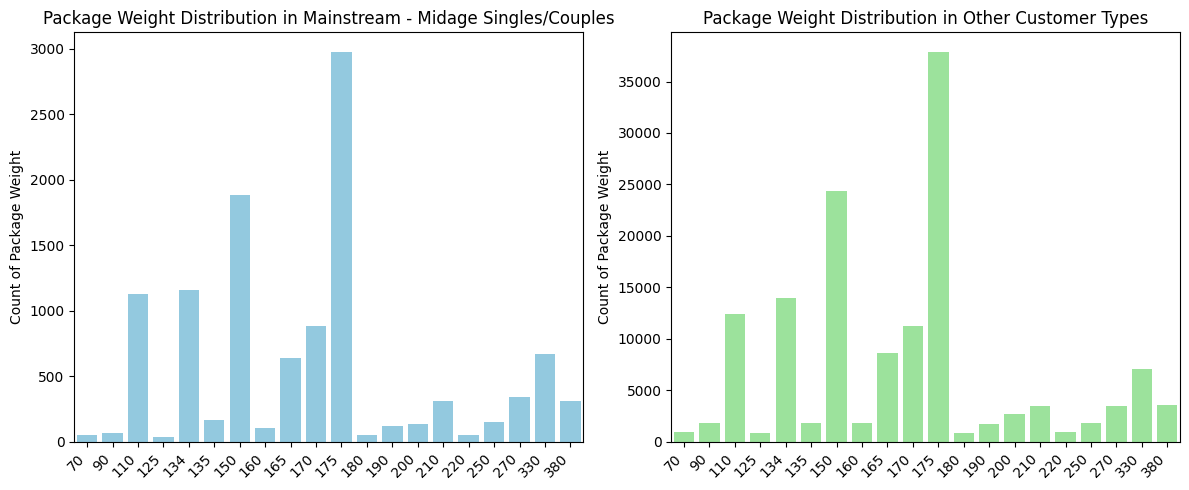

In [315]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the first graph
sns.countplot(x='GRAMS', data=QVI_data_filter, ax=axes[0], color='skyblue')
axes[0].set_title('Package Weight Distribution in Mainstream - Midage Singles/Couples')

# Optionally, rotate x-axis labels for better visibility
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('')  # Hide x-axis title
axes[0].set_ylabel('Count of Package Weight')

# Plotting the second graph
sns.countplot(x='GRAMS', data=QVI_data_filter2, ax=axes[1],color='lightgreen')
axes[1].set_title('Package Weight Distribution in Other Customer Types')

# Optionally, rotate x-axis labels for better visibility
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('')  # Hide x-axis title
axes[1].set_ylabel('Count of Package Weight')

# Adjust layout
plt.tight_layout()
plt.show()

From the above analysis, we can see that both specific customer targets and others are more tend to buy chips that weigh 175gr.

#### Mainstream - Young Singles/Couples

In [316]:
# Create the DataFrame by filtering
QVI_data_filter3 = QVI_data[(QVI_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (QVI_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
QVI_data_filter4 = QVI_data[(QVI_data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & (QVI_data['PREMIUM_CUSTOMER'] != 'Mainstream')]

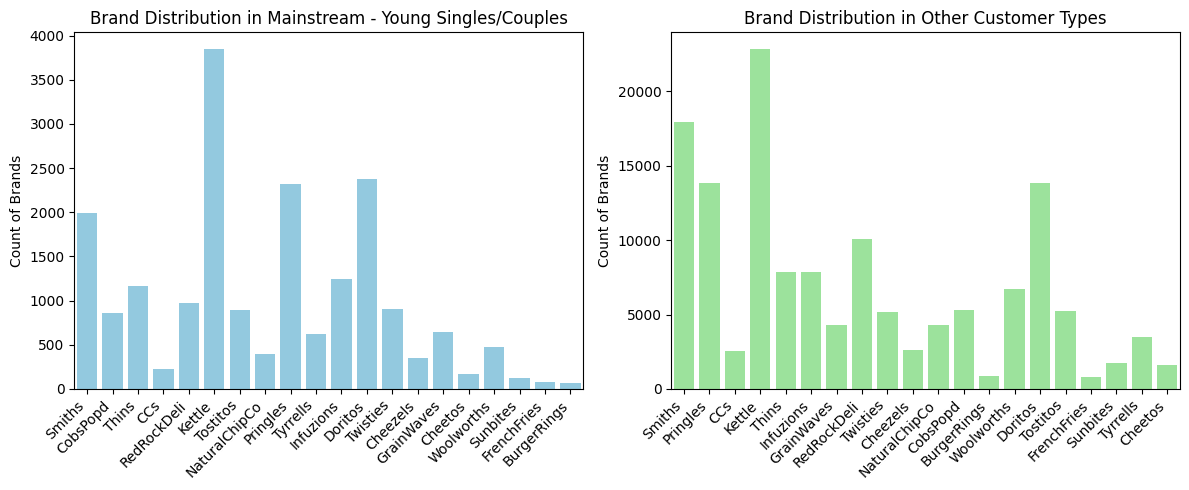

In [317]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the first graph
sns.countplot(x='BRAND_NAME', data=QVI_data_filter3, ax=axes[0], color='skyblue')
axes[0].set_title('Brand Distribution in Mainstream - Young Singles/Couples')

# Optionally, rotate x-axis labels for better visibility
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('')  # Hide x-axis title
axes[0].set_ylabel('Count of Brands')

# Plotting the second graph
sns.countplot(x='BRAND_NAME', data=QVI_data_filter4, ax=axes[1],color='lightgreen')
axes[1].set_title('Brand Distribution in Other Customer Types')

# Optionally, rotate x-axis labels for better visibility
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('')  # Hide x-axis title
axes[1].set_ylabel('Count of Brands')

# Adjust layout
plt.tight_layout()
plt.show()

From the above graph, we can easily say that young singles/ couples who are mainstream tend to buy more Kettles brands with a significant difference. Doritos and Pringles are following this.

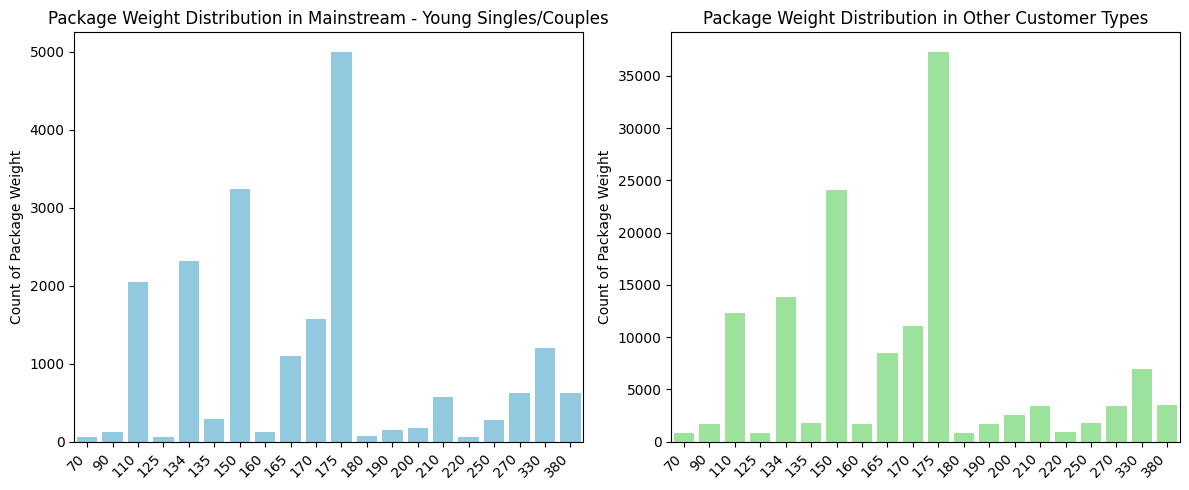

In [318]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the first graph
sns.countplot(x='GRAMS', data=QVI_data_filter3, ax=axes[0], color='skyblue')
axes[0].set_title('Package Weight Distribution in Mainstream - Young Singles/Couples')

# Optionally, rotate x-axis labels for better visibility
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('')  # Hide x-axis title
axes[0].set_ylabel('Count of Package Weight')

# Plotting the second graph
sns.countplot(x='GRAMS', data=QVI_data_filter4, ax=axes[1],color='lightgreen')
axes[1].set_title('Package Weight Distribution in Other Customer Types')

# Optionally, rotate x-axis labels for better visibility
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('')  # Hide x-axis title
axes[1].set_ylabel('Count of Package Weight')

# Adjust layout
plt.tight_layout()
plt.show()

From the above analysis, we can see that both specific customer targets and others are more tend to buy chips that weigh 175gr.